# Algo-2(Simple Non Linear Regression)

In [19]:
import pandas as pd

In [29]:
df = pd.DataFrame({"in":[1,2,3,4,5],"ou":[1,4,9,16,25]})
df

,in,ou
0,1,1
1,2,4
2,3,9
3,4,16
4,5,25


In [23]:
x= df[["in"]]
y=df["ou"]

In [25]:
from sklearn. linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [31]:
#x&y
x= df[["in"]]
y=df ["ou"]

#modelling
from sklearn. linear_model import LinearRegression
model = LinearRegression()
model. fit(x,y)

#prediction
ypred = model.predict(x)

#evaluation
model.score(x,y)

0.9625668449197861

In [36]:
df["in2"] = df["in"]*df["in"]
df

,in,ou,in2
0,1,1,1
1,2,4,4
2,3,9,9
3,4,16,16
4,5,25,25


- Non Linear Regression 

In [38]:
#x&y
x= df[["in","in2"]]
y=df ["ou"]

#modelling
from sklearn. linear_model import LinearRegression
model = LinearRegression()
model. fit(x,y)

#prediction
ypred = model.predict(x)

#evaluation
model.score(x,y)

1.0

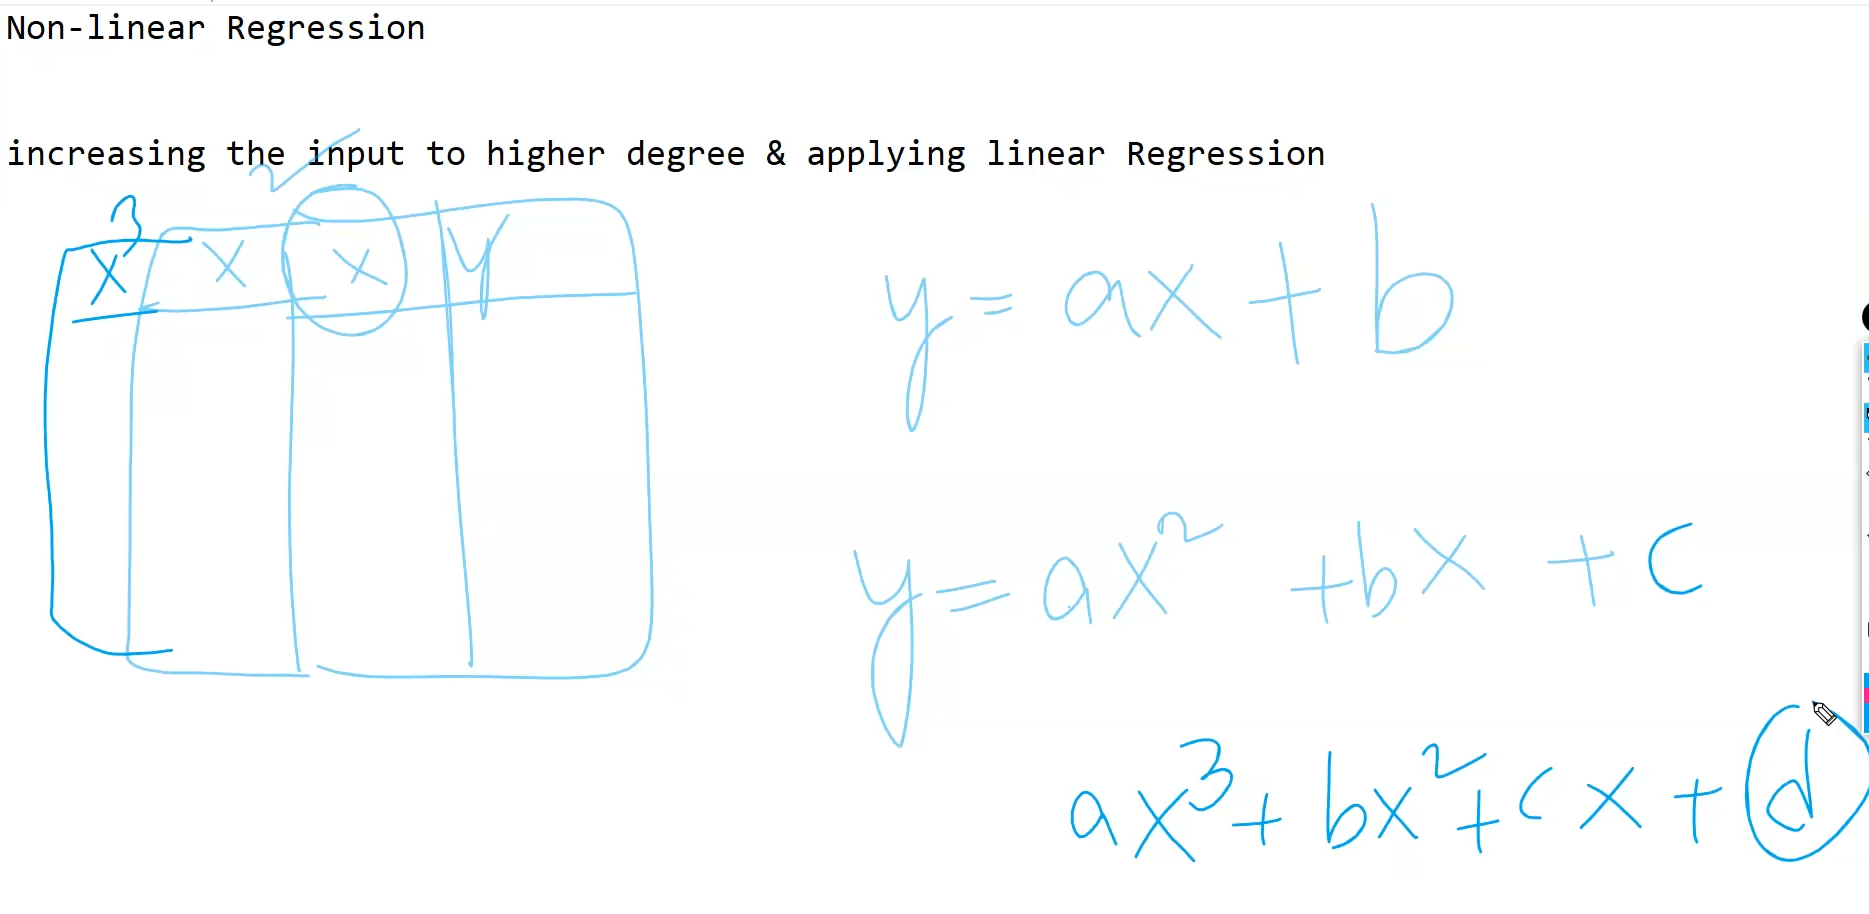

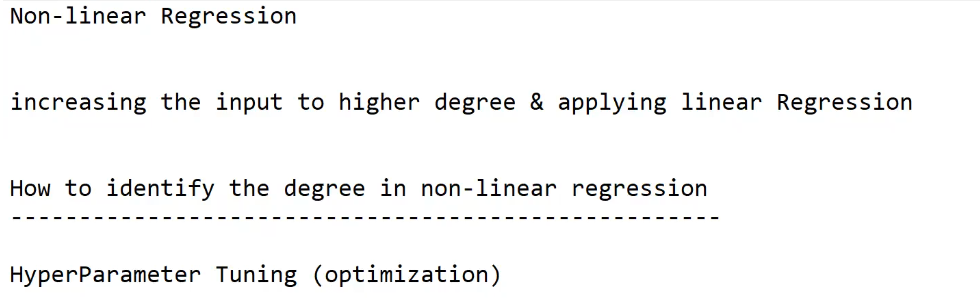

- **Project Continuation**

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_excel("cleaned_data_1.xlsx")
df

,sales,total_spend
0,22100,337100
1,10400,128900
2,9300,132400
3,18500,251300
4,12900,250000
...,...,...
195,7600,55700
196,9700,107200
197,12800,192700
198,25500,391800


In [6]:
X= df[["total_spend"]]
y= df ["sales"]

- **Train-Test_Split**

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [11]:
X_train

,total_spend
50,237500
115,162800
5,132600
6,113800
114,159500
...,...
159,184700
152,235100
37,169800
84,290300


# **Step-4,5: Modeling & Evaluation**

$$ \hat{y} = \beta_0 + \beta_1X$$

- We will have another column which has 1 value for each record we dont require as we already have intercept

In [83]:
from sklearn. preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=3,include_bias=True)                       # Bias as True
X_train_poly = pd. DataFrame(polynomial_converter.fit_transform(X_train))
X_train_poly

,0,1,2,3
0,1.0,237500.0,5.640625e+10,1.339648e+16
1,1.0,162800.0,2.650384e+10,4.314825e+15
2,1.0,132600.0,1.758276e+10,2.331474e+15
3,1.0,113800.0,1.295044e+10,1.473760e+15
4,1.0,159500.0,2.544025e+10,4.057720e+15
...,...,...,...,...
155,1.0,184700.0,3.411409e+10,6.300872e+15
156,1.0,235100.0,5.527201e+10,1.299445e+16
157,1.0,169800.0,2.883204e+10,4.895680e+15
158,1.0,290300.0,8.427409e+10,2.446477e+16


In [48]:
from sklearn. preprocessing import PolynomialFeatures

polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

X_train_poly = pd. DataFrame(polynomial_converter.fit_transform(X_train))

In [50]:
X_train_poly

,0,1
0,237500.0,5.640625e+10
1,162800.0,2.650384e+10
2,132600.0,1.758276e+10
3,113800.0,1.295044e+10
4,159500.0,2.544025e+10
...,...,...
155,184700.0,3.411409e+10
156,235100.0,5.527201e+10
157,169800.0,2.883204e+10
158,290300.0,8.427409e+10


In [52]:
#Modelling on train data
from sklearn. linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_poly,y_train)

LinearRegression()

In [54]:
# prediction on train data
ypred_train = model.predict(X_train_poly)

#evalution
from sklearn.metrics import mean_squared_error
print("Train RMSE:",np.sqrt(mean_squared_error(y_train,ypred_train)))

from sklearn.metrics import r2_score
print("Train R2:",r2_score(y_train,ypred_train))

Train RMSE: 2626.4008272917076
Train R2: 0.7429435351040902


In [56]:
#Cross validation Score
from sklearn.model_selection import cross_val_score
print("CV Score:", cross_val_score(model, X_train_poly,y_train,cv=5).mean())

CV Score: 0.7313044002993077


In [58]:
X_test_poly = pd. DataFrame(polynomial_converter.transform(X_test))

# prediction on test data
ypred_test = model.predict(X_test_poly)

#Evaluation on test data
print("Test RMSE:",np.sqrt(mean_squared_error(y_test,ypred_test)))
print("Test R2:",r2_score(y_test,ypred_test))

Test RMSE: 2425.9887213980437
Test R2: 0.7862795664854056


- **Instead of doing this in different cells we can do it in a single cell**

In [65]:
from sklearn. preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)                       # Degree == 2
X_train_poly = pd. DataFrame(polynomial_converter.fit_transform(X_train))

#Modelling on train data
from sklearn. linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_poly,y_train)

# prediction on train data
ypred_train = model.predict(X_train_poly)
#evalution
from sklearn.metrics import mean_squared_error
print("Train RMSE:",np.sqrt(mean_squared_error(y_train,ypred_train)))
from sklearn.metrics import r2_score
print("Train R2:",r2_score(y_train,ypred_train))

#Cross validation Score
from sklearn.model_selection import cross_val_score
print("CV Score:", cross_val_score(model, X_train_poly,y_train,cv=5).mean())

X_test_poly = pd. DataFrame(polynomial_converter.transform(X_test))
# prediction on test data
ypred_test = model.predict(X_test_poly)
#Evaluation on test data
print("Test RMSE:",np.sqrt(mean_squared_error(y_test,ypred_test)))
print("Test R2:",r2_score(y_test,ypred_test))

Train RMSE: 2626.4008272917076
Train R2: 0.7429435351040902
CV Score: 0.7313044002993077
Test RMSE: 2425.9887213980437
Test R2: 0.7862795664854056


In [67]:
from sklearn. preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)                     # Degree == 3
X_train_poly = pd. DataFrame(polynomial_converter.fit_transform(X_train))

#Modelling on train data
from sklearn. linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_poly,y_train)

# prediction on train data
ypred_train = model.predict(X_train_poly)
#evalution
from sklearn.metrics import mean_squared_error
print("Train RMSE:",np.sqrt(mean_squared_error(y_train,ypred_train)))
from sklearn.metrics import r2_score
print("Train R2:",r2_score(y_train,ypred_train))

#Cross validation Score
from sklearn.model_selection import cross_val_score
print("CV Score:", cross_val_score(model, X_train_poly,y_train,cv=5).mean())

X_test_poly = pd. DataFrame(polynomial_converter.transform(X_test))
# prediction on test data
ypred_test = model.predict(X_test_poly)
#Evaluation on test data
print("Test RMSE:",np.sqrt(mean_squared_error(y_test,ypred_test)))
print("Test R2:",r2_score(y_test,ypred_test))

Train RMSE: 2606.0973158365664
Train R2: 0.7469025465324366
CV Score: 0.7233322003979313
Test RMSE: 2410.3702816271552
Test R2: 0.7890225592986996


In [71]:
from sklearn. preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=4,include_bias=False)                    # Degree == 4
X_train_poly = pd. DataFrame(polynomial_converter.fit_transform(X_train))

#Modelling on train data
from sklearn. linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_poly,y_train)

# prediction on train data
ypred_train = model.predict(X_train_poly)
#evalution
from sklearn.metrics import mean_squared_error
print("Train RMSE:",np.sqrt(mean_squared_error(y_train,ypred_train)))
from sklearn.metrics import r2_score
print("Train R2:",r2_score(y_train,ypred_train))

#Cross validation Score
from sklearn.model_selection import cross_val_score
print("CV Score:", cross_val_score(model, X_train_poly,y_train,cv=5).mean())

X_test_poly = pd. DataFrame(polynomial_converter.transform(X_test))
# prediction on test data
ypred_test = model.predict(X_test_poly)
#Evaluation on test data
print("Test RMSE:",np.sqrt(mean_squared_error(y_test,ypred_test)))
print("Test R2:",r2_score(y_test,ypred_test))

Train RMSE: 2631.3746158203585
Train R2: 0.7419690036349784
CV Score: 0.7034275365553891
Test RMSE: 2473.7155334056683
Test R2: 0.7777877463994569


- **As Accuracy wise Degree == 3 is the best as it has test r2 78.9 which is highest**

In [78]:
%%timeit                                                                                   # Shows the time for execution

from sklearn. preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)                     # Degree == 3
X_train_poly = pd. DataFrame(polynomial_converter.fit_transform(X_train))

#Modelling on train data
from sklearn. linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_poly,y_train)

# prediction on train data
ypred_train = model.predict(X_train_poly)
#evalution
from sklearn.metrics import mean_squared_error
print("Train RMSE:",np.sqrt(mean_squared_error(y_train,ypred_train)))
from sklearn.metrics import r2_score
print("Train R2:",r2_score(y_train,ypred_train))

#Cross validation Score
from sklearn.model_selection import cross_val_score
print("CV Score:", cross_val_score(model, X_train_poly,y_train,cv=5).mean())

X_test_poly = pd. DataFrame(polynomial_converter.transform(X_test))
# prediction on test data
ypred_test = model.predict(X_test_poly)
#Evaluation on test data
print("Test RMSE:",np.sqrt(mean_squared_error(y_test,ypred_test)))
print("Test R2:",r2_score(y_test,ypred_test))

Train RMSE: 2606.0973158365664
Train R2: 0.7469025465324366
CV Score: 0.7233322003979313
Test RMSE: 2410.3702816271552
Test R2: 0.7890225592986996
Train RMSE: 2606.0973158365664
Train R2: 0.7469025465324366
CV Score: 0.7233322003979313
Test RMSE: 2410.3702816271552
Test R2: 0.7890225592986996
Train RMSE: 2606.0973158365664
Train R2: 0.7469025465324366
CV Score: 0.7233322003979313
Test RMSE: 2410.3702816271552
Test R2: 0.7890225592986996
Train RMSE: 2606.0973158365664
Train R2: 0.7469025465324366
CV Score: 0.7233322003979313
Test RMSE: 2410.3702816271552
Test R2: 0.7890225592986996
Train RMSE: 2606.0973158365664
Train R2: 0.7469025465324366
CV Score: 0.7233322003979313
Test RMSE: 2410.3702816271552
Test R2: 0.7890225592986996
Train RMSE: 2606.0973158365664
Train R2: 0.7469025465324366
CV Score: 0.7233322003979313
Test RMSE: 2410.3702816271552
Test R2: 0.7890225592986996
Train RMSE: 2606.0973158365664
Train R2: 0.7469025465324366
CV Score: 0.7233322003979313
Test RMSE: 2410.3702816271552